In [1]:
import warnings
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv(r'datasets/DiabetesPrediction/diabetes_prediction_dataset.csv')

In [3]:
data.head(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0


&nbsp;
O nível de HbA1c (hemoglobina A1c) é uma medida do nível médio de açúcar no sangue de uma pessoa nos últimos 2-3 meses. Níveis mais altos

&nbsp;

# Analysis Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Verificando valores nulos no meu conjunto de dados

In [6]:
data.loc[ data.isna().any(axis=1) ]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [7]:
data.loc[ data.isna().any(axis=1) ]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


### Diabetes

In [8]:
countDiabetes = data['diabetes'].value_counts().reset_index(name='quantidade')

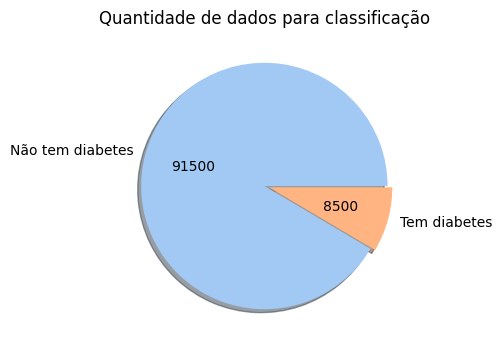

In [9]:
plt.figure(figsize=(5,4))
plt.pie( x = countDiabetes['quantidade'], explode=(0,0.04) , labels = ['Não tem diabetes','Tem diabetes'],autopct=lambda x: '{:.0f}'.format(x*countDiabetes['quantidade'].sum()/100) ,colors=sea.color_palette('pastel')[0:2],shadow=True)
plt.title('Quantidade de dados para classificação')
plt.show()

Os atributo `Diabetes` está desbalanceados com isso para a classificação se faz necessário o balaceamento dele. \
Como as pessoas que não tem diabetes está em mais quantidade ( muito mais) do que as que tem diabetes , irei fazer UnderSampling para o balanceamento dos dados.  

### Gender

In [10]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [11]:
data.loc[data['gender']=='Other'][['diabetes','hypertension','heart_disease','smoking_history']].value_counts().reset_index()

,diabetes,hypertension,heart_disease,smoking_history,count
0,0,0,0,not current,8
1,0,0,0,No Info,6
2,0,0,0,never,3
3,0,0,0,ever,1


In [12]:
print('Média de idade para pessoas de outro gênero :',data.loc[data['gender']=='Other']['age'].mean())

Média de idade para pessoas de outro gênero : 29.555555555555557


Esses dados para pessoa `gender` == `other` são redundantes, os valores dos atributos `hypertension` , `heart_disease` em relação `diabete` não muda continua 0, além de não mudar o valor do atributo `diabetes` continua zero. \
Com isso será removido do conjunto de dados.

In [13]:
data.drop( index = data.loc[ data['gender'] == 'Other'].index , inplace = True )

In [14]:
countGender = data['gender'].value_counts().reset_index(name='Quantidade')

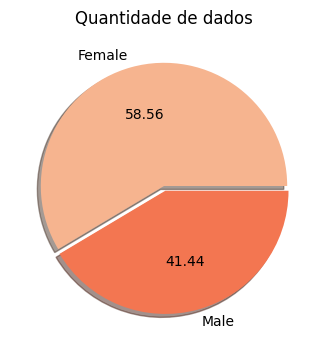

In [15]:
plt.figure(figsize=(10,4))
plt.pie( x = countGender['Quantidade'], explode=(0,0.04) , labels = countGender['gender'] ,colors = sea.color_palette('rocket_r')[0:2] , autopct='%.2f' ,shadow=True )
plt.title('Quantidade de dados')
plt.show()

Possui muito mais dados do genero feminino que o masculino. 

In [16]:
countGenderDiabetes = data.groupby( by=['gender','diabetes'] )['age'].mean().reset_index(name='Média de idade')

In [17]:
SelectDiatebes0 = data.loc[data['diabetes'] == 0][['age','gender']]
SelectDiatebes1 = data.loc[data['diabetes'] == 1][['age','gender']]

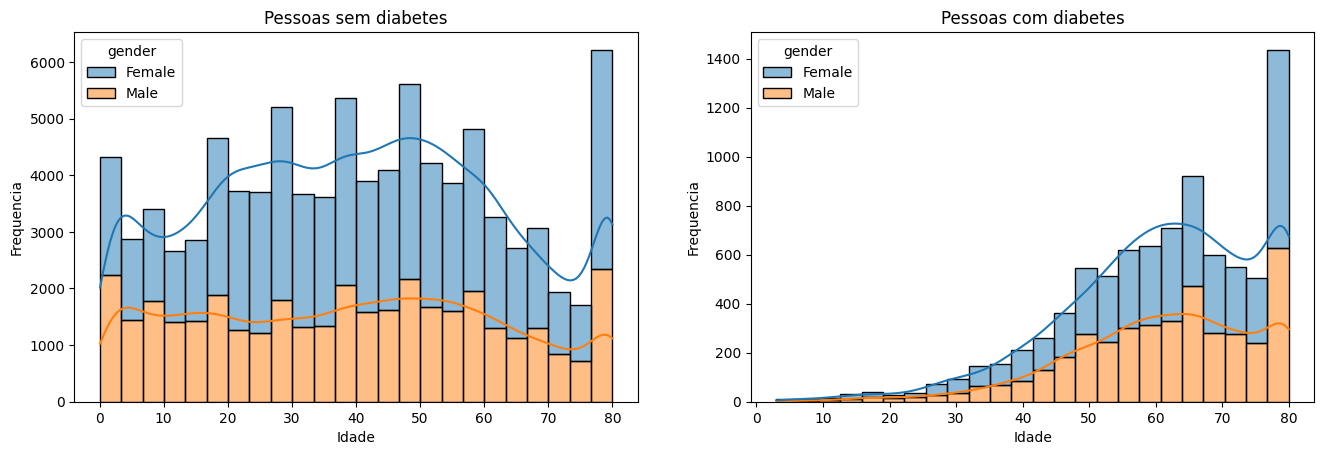

In [18]:
fig , ax = plt.subplots(1,2)
fig.set_figwidth(16)

#Sem diabetes
sea.histplot(
    x = SelectDiatebes0['age'], hue = SelectDiatebes0['gender'] , ax = ax[0] ,multiple="stack", 
    kde = True, shrink = 1 , bins = 24
)
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Frequencia')
ax[0].set_title('Pessoas sem diabetes')

# Com diabetes
sea.histplot(
    x = SelectDiatebes1['age'], hue = SelectDiatebes1['gender'], ax = ax[1] , multiple="stack", 
    kde= True, shrink=1, bins = 24
)
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Frequencia')
ax[1].set_title('Pessoas com diabetes')

plt.show()

In [19]:
groupGenHype = data.groupby( by = ['gender'])['hypertension'].value_counts().reset_index(name = 'Quantidade')

In [20]:
groupGenHeart = data.groupby( by = ['gender'])['heart_disease'].value_counts().reset_index(name = 'Quantidade')

In [21]:
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

groupGenHype['hypertension'].loc[groupGenHype['hypertension'] == 0]     = 'Não tem hipertensão'
groupGenHype['hypertension'].loc[groupGenHype['hypertension'] == 1]     = 'Tem hipertensão'
groupGenHeart['heart_disease'].loc[groupGenHeart['heart_disease'] == 0] = 'Não doença cardiaca'
groupGenHeart['heart_disease'].loc[groupGenHeart['heart_disease'] == 1] = 'Tem doençã cardiaca'

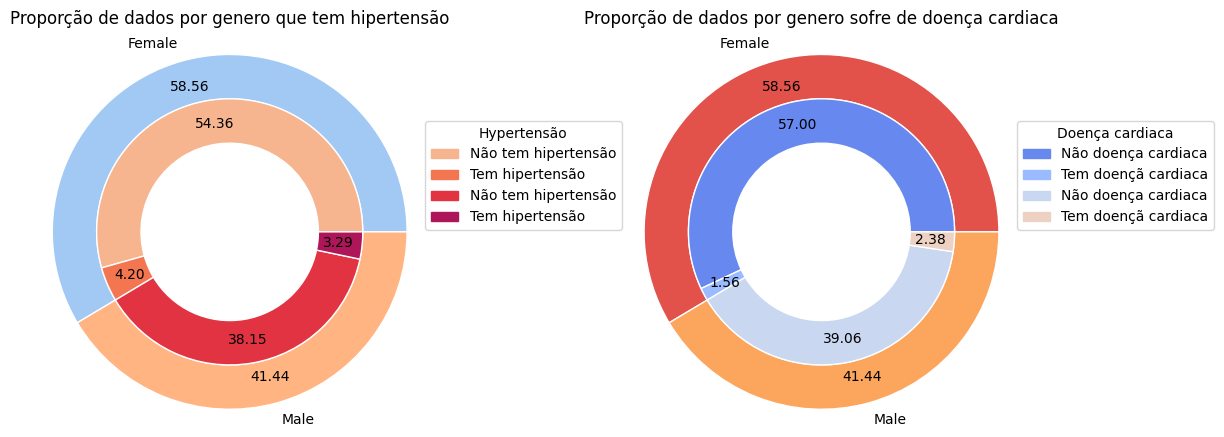

In [22]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(14)
colors1 = sea.color_palette('pastel')[0:2] 
colors2H = sea.color_palette('rocket_r')[0:4] 


ax[0].pie(x = groupGenHype.groupby(by=['gender'])['Quantidade'].sum(), labels= groupGenHype['gender'].drop_duplicates().values ,
       wedgeprops = dict(width=0.3, edgecolor='w'), autopct='%.2f' , pctdistance =0.85 ,colors=colors1 ,radius=1.2)

ax[0].pie(x = groupGenHype.groupby(by=['gender','hypertension'])['Quantidade'].sum() ,wedgeprops=dict(width=0.3, edgecolor='w'),
       radius=.9,autopct='%.2f',pctdistance=0.82 ,colors=colors2H )

colors1 = sea.color_palette('Spectral')[0:2]
colors2 = sea.color_palette('coolwarm')[0:6] 

ax[1].pie(x = groupGenHeart.groupby(by=['gender'])['Quantidade'].sum(), labels= groupGenHype['gender'].drop_duplicates().values ,
       wedgeprops = dict(width=0.3, edgecolor='w'), autopct='%.2f' , pctdistance =0.85 ,colors=colors1 ,radius=1.2)

ax[1].pie(x = groupGenHeart.groupby(by=['gender','heart_disease'])['Quantidade'].sum() ,wedgeprops=dict(width=0.3, edgecolor='w'),
       radius=.9,autopct='%.2f',pctdistance=0.82 ,colors=colors2 )

legends = []
for value, color in zip(groupGenHype['hypertension'].values, colors2H): 
       legends.append(mpatches.Patch(color=color, label=value))

legends2 = []
for value, color in zip(groupGenHeart['heart_disease'].values, colors2): 
       legends2.append(mpatches.Patch(color=color, label=value))

ax[0].legend(title='Hypertensão'    ,handles=legends, bbox_to_anchor=(1.01,0.519,0,0.3))
ax[1].legend(title='Doença cardiaca',handles=legends2, bbox_to_anchor=(1.01,0.519,0,0.3))

ax[0].set_title('Proporção de dados por genero que tem hipertensão',y=1.04)
ax[1].set_title('Proporção de dados por genero sofre de doença cardiaca',y=1.04)

plt.show()

In [23]:
genderGroupby =data.loc[data['diabetes']==1].groupby(by=['gender','hypertension','heart_disease'])['age'].apply(lambda x:x).reset_index()

In [24]:
genderGroupby = pd.concat([genderGroupby.drop(columns='age'),pd.cut(genderGroupby['age'],20)],axis=1)
genderGroupby.head(3)

,gender,hypertension,heart_disease,level_3,age
0,Female,0,0,6,"(41.5, 45.35]"
1,Female,0,0,53,"(49.2, 53.05]"
2,Female,0,0,59,"(64.6, 68.45]"


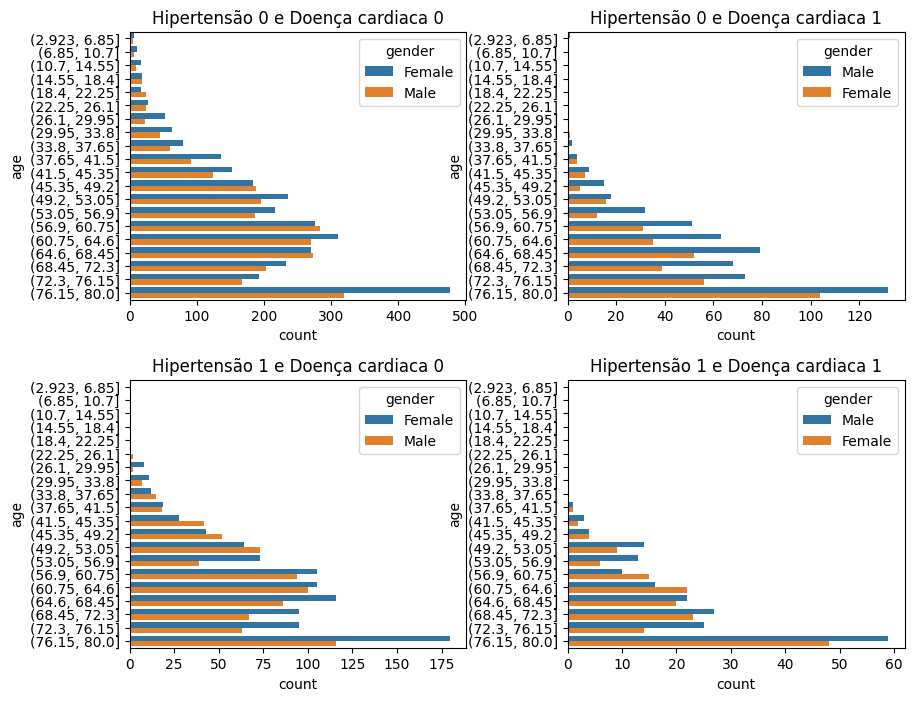

In [25]:
from itertools import product
fig , ax = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(8)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in list(product([0,1],repeat=2)):
    select = genderGroupby.loc[ (genderGroupby['hypertension' ]== i[0]) & (genderGroupby['heart_disease']== i[1])
                                ][['age','gender']].value_counts().reset_index() 
    
    ax[i[0],i[1]].set_title(f'Hipertensão {i[0]} e Doença cardiaca {i[1]}')
    sea.barplot(x=select['count'],y=select['age'],hue=select['gender'],orient='h',ax=ax[i[0],i[1]])

> Esse grafico assima e para as pessoas que tem diabetes

### Hipertensão

[]

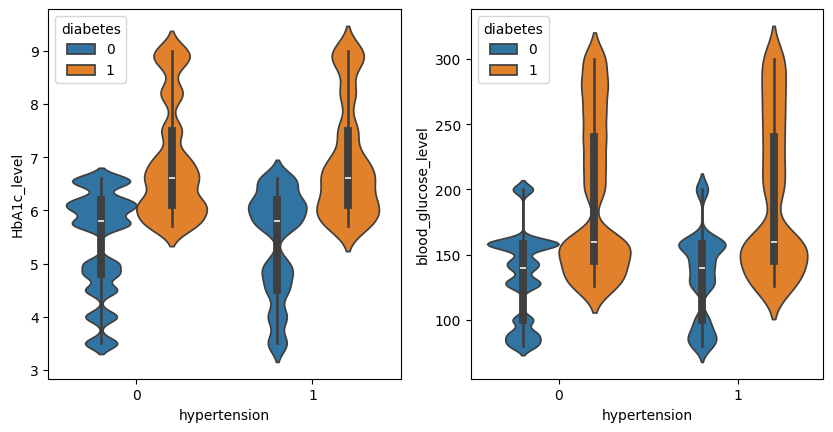

In [26]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(10)
sea.violinplot(x = data['hypertension'] , y= data['HbA1c_level'] , hue=data['diabetes'] ,ax = ax[0])
sea.violinplot(x = data['hypertension'] ,y= data['blood_glucose_level'] , hue=data['diabetes'], ax= ax[1])
plt.plot()

In [27]:
data.groupby( by = ['smoking_history' ,'diabetes'] ).size().apply(lambda x:(x*100)/data['smoking_history'].count()).reset_index(name='%')

,smoking_history,diabetes,%
0,No Info,0,34.362185
1,No Info,1,1.454262
2,current,0,8.339501
3,current,1,0.948171
4,ever,0,3.531636
5,ever,1,0.472085
6,former,0,7.763397
7,former,1,1.590286
8,never,0,31.751715
9,never,1,3.346602


In [28]:
sea.pairplot(data[['diabetes','bmi','HbA1c_level','blood_glucose_level']],hue='diabetes')
plt.show()

KeyboardInterrupt: 

In [ ]:
sea.boxplot(data[['bmi','HbA1c_level','blood_glucose_level','age']])
plt.show()

&nbsp;

&nbsp;

# Classificação

In [ ]:
from sklearn.metrics         import *
from sklearn.preprocessing   import LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

In [ ]:
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC

### Preprocessamento

In [ ]:
classeGender = LabelBinarizer()
data['gender'] = classeGender.fit_transform(data['gender'])

In [ ]:
classSmoking = LabelEncoder()
data['smoking_history'] = classSmoking.fit_transform(data['smoking_history'])

In [ ]:
sea.heatmap(data.corr()[::-1],annot=True,cmap='YlOrBr',cbar=False)
plt.title('Correlação')
plt.show()

In [ ]:
dataset = pd.get_dummies(data,columns=['smoking_history','gender','hypertension','heart_disease'],dtype=int)

### UnderSampling
Balanceando os dados, há mais dados `0` não tem diabetes do que `1` tem diabetes

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under = RandomUnderSampler(sampling_strategy = 'majority' , random_state=42)

In [ ]:
X = dataset.drop( columns = ['diabetes'])
Y = dataset['diabetes']

In [ ]:
xUnder ,yUnder = under.fit_resample(X,Y)

In [ ]:
p = yUnder.value_counts().reset_index()
plt.figure(figsize=(4,3))
plt.pie( x = p['count'] , labels=['Não tem','Tem'],autopct='%.2f',colors=sea.color_palette('pastel'))
plt.show()

### Dividindo dados de teste e treinamento

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split( xUnder.values , yUnder.values , test_size=0.25 , random_state=42)

### KNN
Vou ver o melhor parametros para knn e depois fazer a validação cruzada do mesmo

In [ ]:
params = {
    'n_neighbors':[3,5,10],
    'weights'    :['uniform','distance'],
    'algorithm'  :['ball_tree','kd_tree','brute'],
    'n_jobs'     :[None,1,3,5,7]
}

In [ ]:
knn      = KNeighborsClassifier()

In [ ]:
crossKnn = GridSearchCV(knn,param_grid=params,scoring='accuracy')

In [ ]:
crossKnn.fit(xtrain,ytrain)

In [ ]:
print("Melhor estimador para o algoritmos knn :\n",crossKnn.best_estimator_)

In [ ]:
print("Melhor parametro: \n",crossKnn.best_params_)

In [ ]:
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10, weights='distance')

In [ ]:
knn.fit(xtrain,ytrain)

In [ ]:
pred = knn.predict(xtest)

In [ ]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

In [ ]:
print(classification_report(ytest,pred))

&nbsp;

### Árvore de decisão

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter' :['best', 'random'],
}

In [ ]:
gridTree = GridSearchCV(tree,param_grid=params,scoring='accuracy')

In [ ]:
gridTree.fit(xtrain,ytrain)

In [ ]:
print('Melhor Parametro para o algoritmo:\n',gridTree.best_estimator_)

In [ ]:
print('Melhor Parametro para o algoritmo:\n',gridTree.best_params_)

In [ ]:
gridTree.best_score_

In [ ]:
tree = DecisionTreeClassifier(criterion= 'gini', splitter= 'best')

In [ ]:
tree.fit(xtrain,ytrain)

In [ ]:
pred = tree.predict(xtest)

In [ ]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

In [ ]:
print(classification_report(ytest,pred))

&nbsp;

### Naive bayes

In [ ]:
bayes = GaussianNB()

In [ ]:
bayes.fit(xtrain,ytrain)

In [ ]:
pred = bayes.predict(xtest)

In [ ]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

In [ ]:
print(classification_report(ytest,pred))

&nbsp;

### Regressão Logistica

In [ ]:
logistic = LogisticRegression()

In [ ]:
params = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'dual':[False,True],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [ ]:
gridLogistic = GridSearchCV(logistic , param_grid= params , scoring='accuracy')

In [ ]:
gridLogistic.fit(xtrain,ytrain)

In [ ]:
print('Melhor Estimador:\n',gridLogistic.best_estimator_)

In [ ]:
gridLogistic.best_score_

In [ ]:
logistic = LogisticRegression(solver='liblinear',max_iter=300)

In [ ]:
logistic.fit(xtrain,ytrain)

In [ ]:
pred = logistic.predict(xtest)

In [ ]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

> Melhor acuracia foi na Árvore de decisão e Regressão Logistica

&nbsp;

## Redes Neurais

In [ ]:
dataset.shape[1]/2

In [ ]:
import keras
from   keras.models import Sequential
from   keras.layers import Dense

In [ ]:
model = Sequential()
model.add(
    Dense(17, activation='relu')
)
model.add(
    Dense(4 , activation='relu')
)
model.add(
    Dense(4 , activation='relu')
)
model.add(
    Dense(1 , activation='sigmoid')
)

In [ ]:
model.compile( optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,batch_size=20,epochs=100)

In [ ]:
pred = model.predict(xtest)>0.5

In [ ]:
accuracy_score(ytest,pred)

In [ ]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

In [ ]:
print(classification_report(ytest,pred))